# Exploratory Data Analysis: Part 2

### Dataset (Red Wine Quality)
- The dataset are related to red variants of the Portuguese "Vinho Verde" wine.
- Input variables (based on physicochemical tests):
  - 1 - fixed acidity
  - 2 - volatile acidity
  - 3 - citric acid
  - 4 - residual sugar
  - 5 - chlorides
  - 6 - free sulfur dioxide
  - 7 - total sulfur dioxide
  - 8 - density
  - 9 - pH
  - 10 - sulphates
  - 11 - alcohol
   Output variable (based on sensory data): 
  - 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [2]:
wine_df = pd.read_csv("E:\ML_course\practice\S5_EDA_(part 2)/red_wine_quality.csv")

In [3]:
wine_df[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,NaN,15.0,54,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5.0
5,7.4,NaN,0.00,1.8,0.075,13.0,40,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5,5.0


### Metadata Exploration

In [4]:
wine_df.shape

(1000, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      944 non-null    float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             948 non-null    float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   int64  
 7   density               953 non-null    float64
 8   pH                    1000 non-null   float64
 9   sulphates             958 non-null    float64
 10  alcohol               1000 non-null   float64
 11  quality               975 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


#### Note:

* It can be observed that some of the columns like *volatile acidity*, *chlorides*, *sulphates* and *quality* have missing values.

### Visualize the missing values

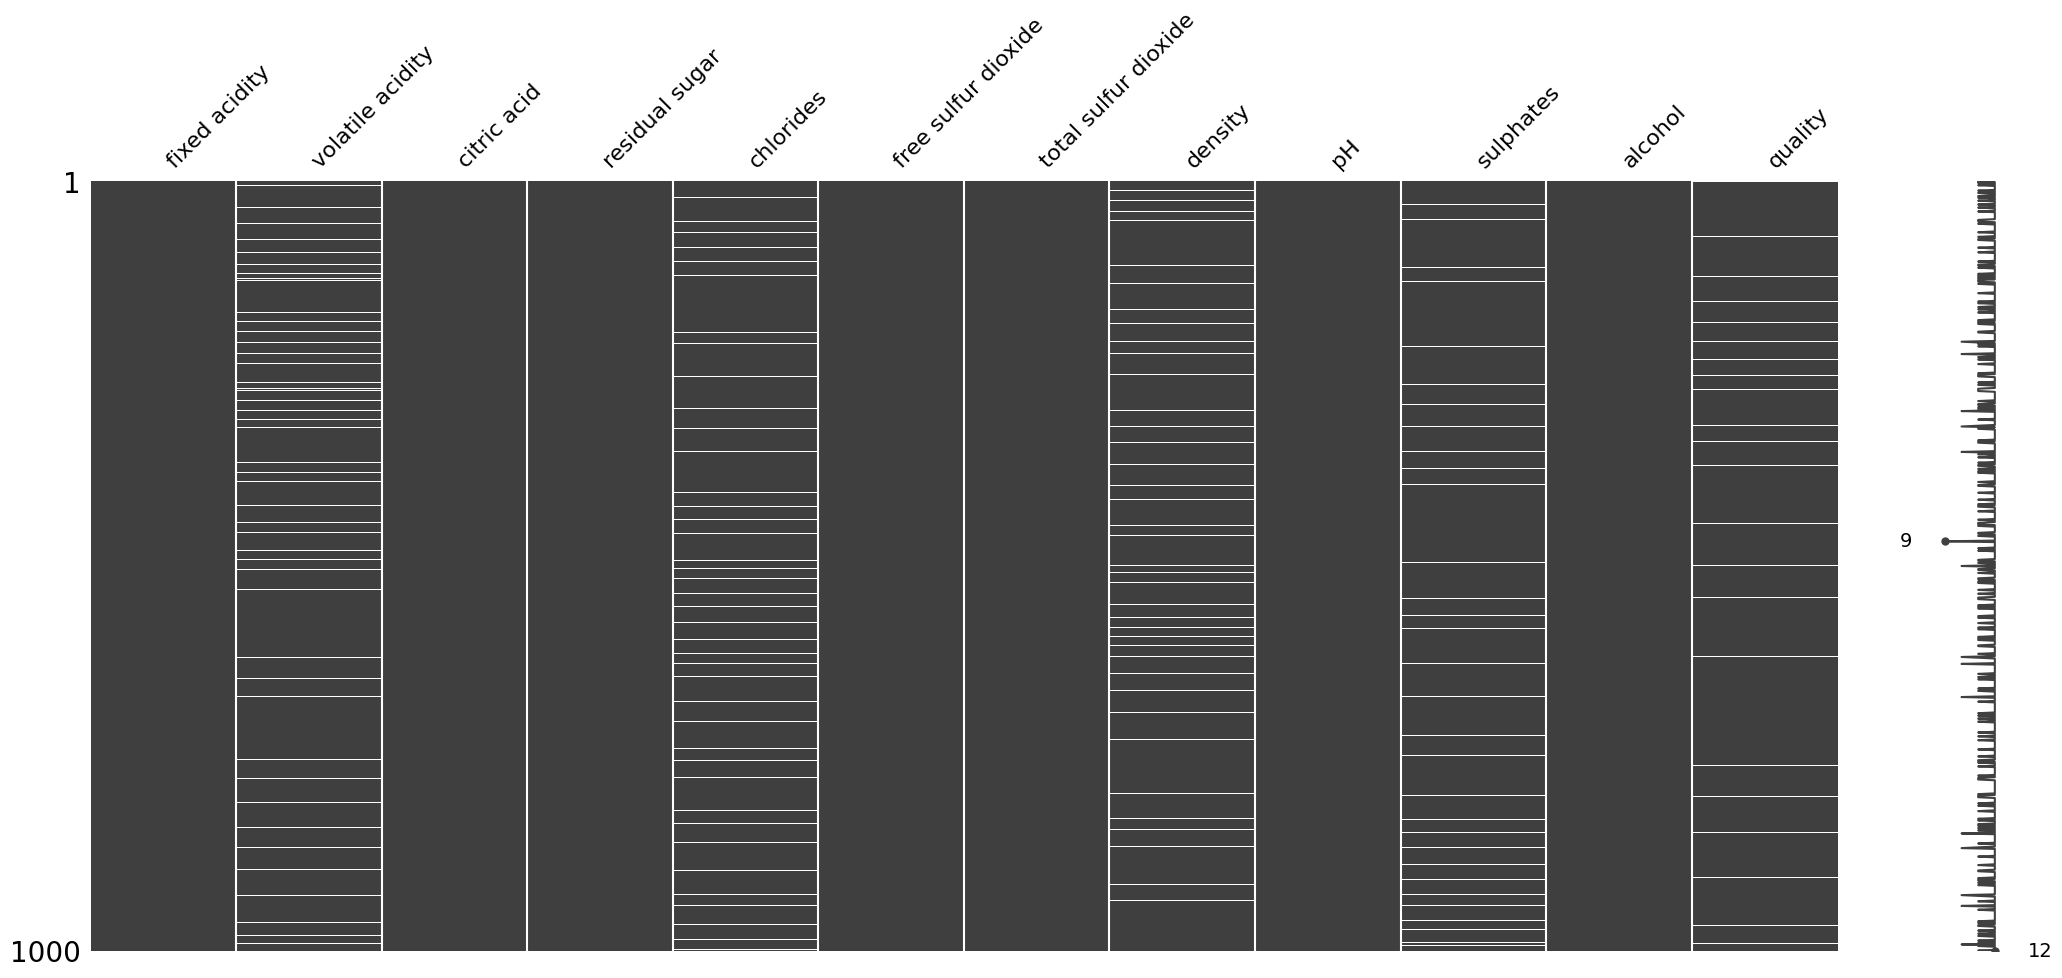

In [6]:
msno.matrix(wine_df);

- Count or percentage of missing values

In [7]:
wine_df.isnull().sum()

fixed acidity            0
volatile acidity        56
citric acid              0
residual sugar           0
chlorides               52
free sulfur dioxide      0
total sulfur dioxide     0
density                 47
pH                       0
sulphates               42
alcohol                  0
quality                 25
dtype: int64

## How to deal with missing values?

There are multiple steps that can be taken

- Obtain the missing data (**Do Serve Again**) ;
- Leave out incomplete cases and use only those for which all variables are available (**Drop the missing value rows**);
- Replace missing data by a conservative estimate (**Data Imputation**) , e.g. the sample mean;
- Estimate the missing data from the other data on the person (**Model Based Imputation**) .

### How much missing value is accepted?

- More than 20% is too much missing.
- In some domain, missing values can not be imputed as it may lead high risk or it may inject too much noise.
    - Example : Medical Data

#### Drop samples with missing values

* All columns with null values can be removed from the dataset. Remove all observations where at least one data element is missing. 

In [8]:
wine_df_clean = wine_df.dropna()

In [9]:
wine_df_clean.shape

(794, 12)

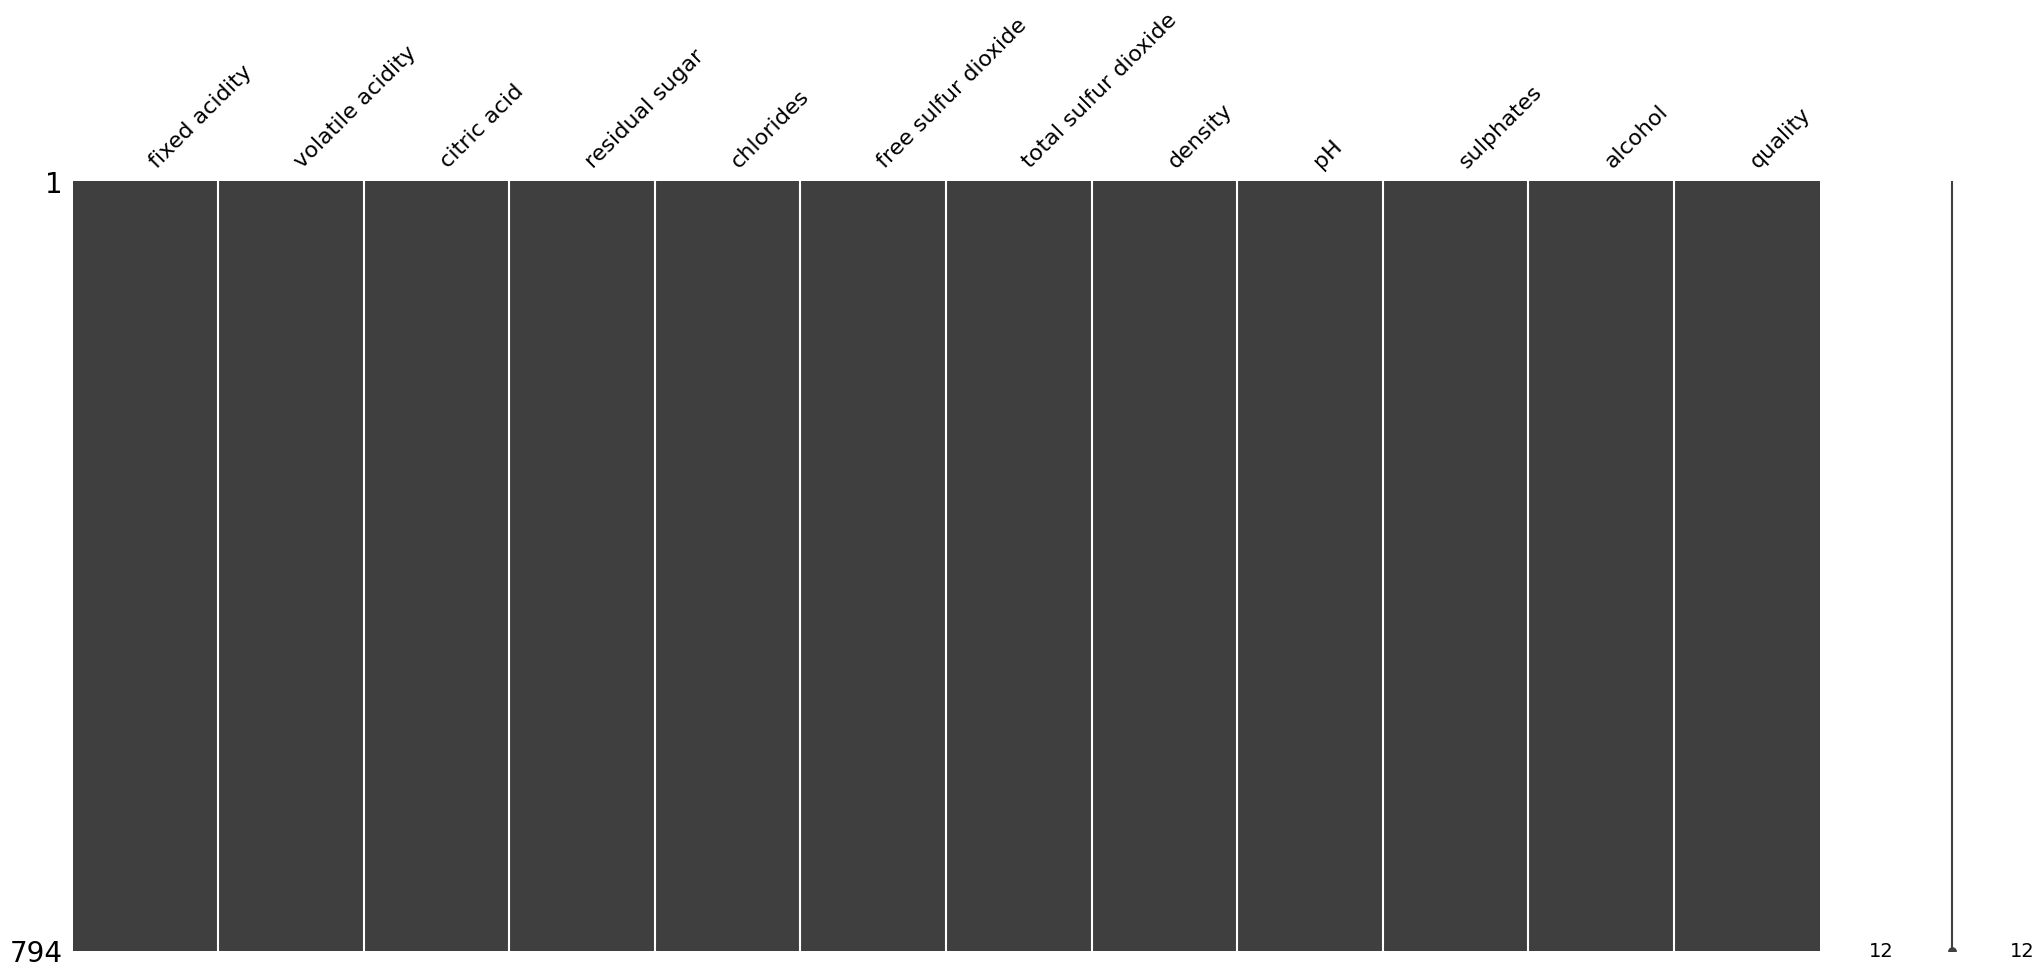

In [10]:
msno.matrix(wine_df_clean);

#### Drop if values are missing from specific columns
* For example, only removing those observations where *density* data is missing.

In [11]:
wine_df_clean = wine_df.dropna(subset= 'density')   # this is for 1 feature

In [12]:
wine_df_clean.shape

(953, 12)

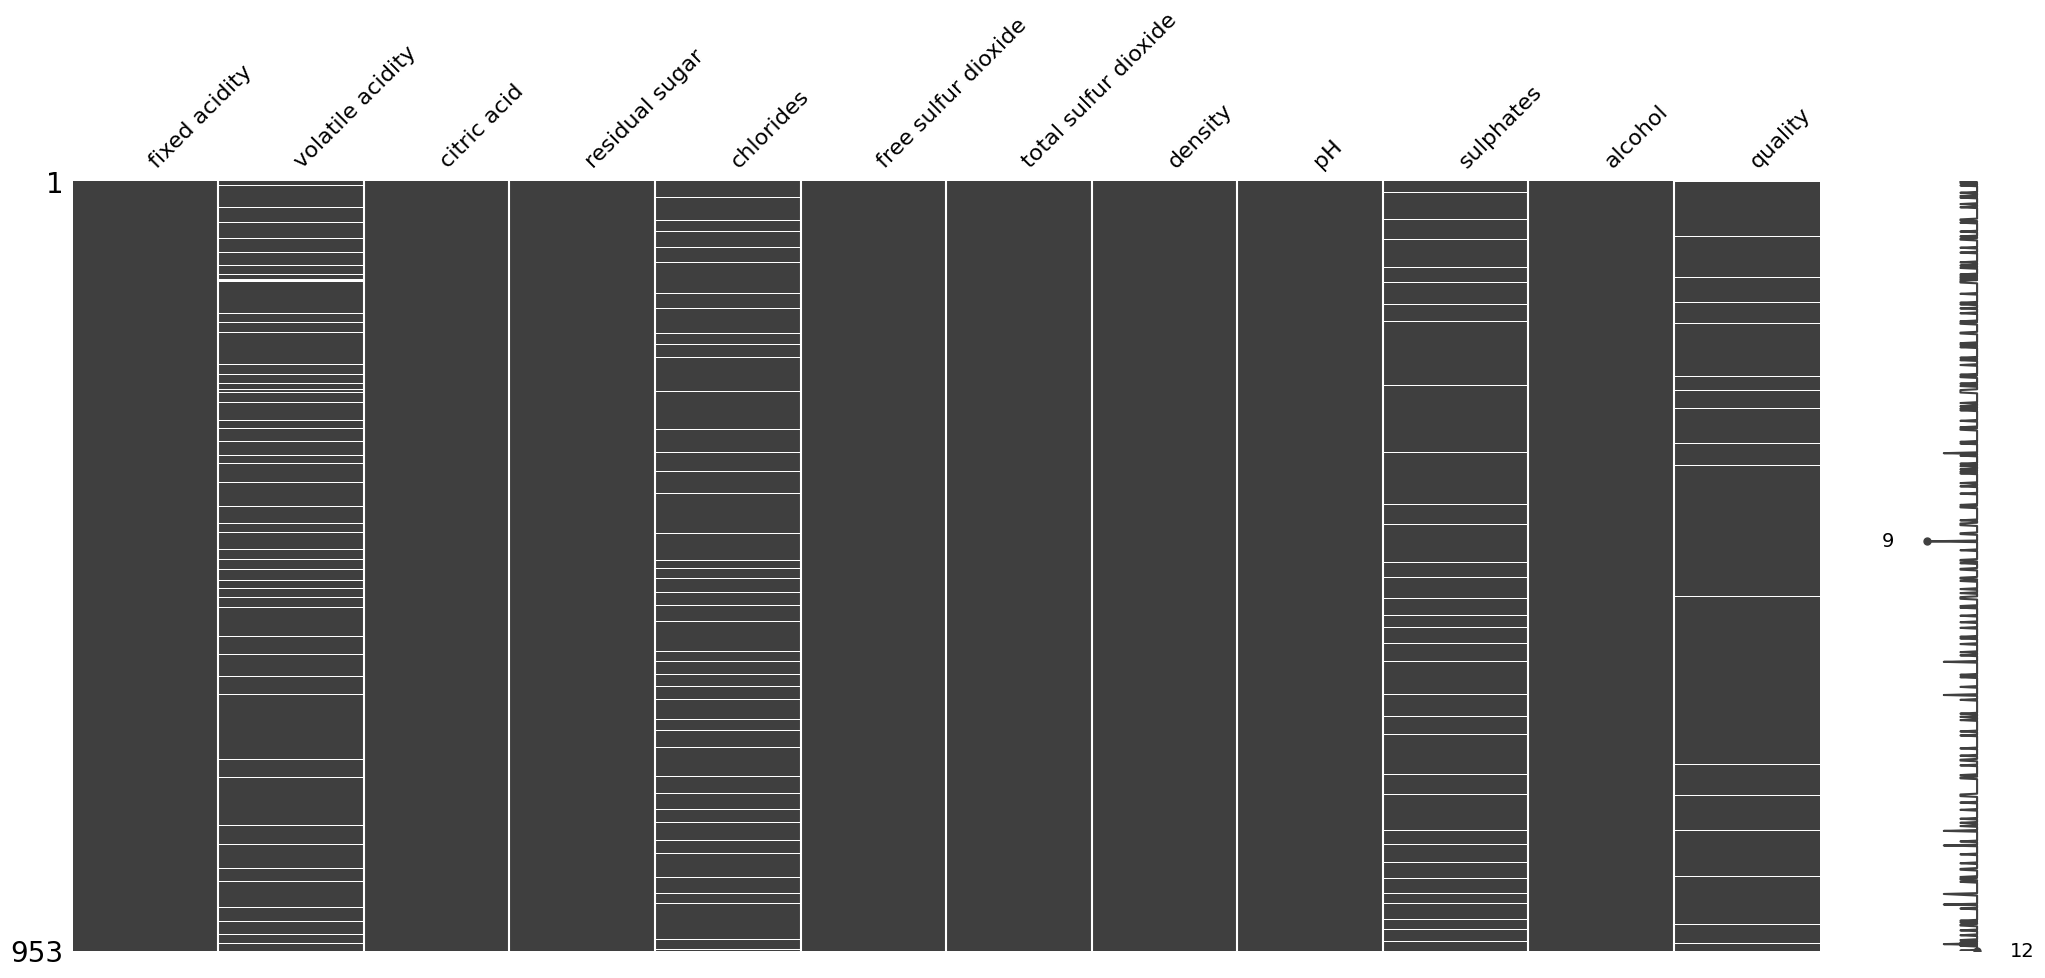

In [13]:
msno.matrix(wine_df_clean);

In [14]:
wine_df_clean_ = wine_df.dropna(subset=['sulphates','chlorides','density']) # for two or more features

In [15]:
wine_df_clean_.shape

(865, 12)

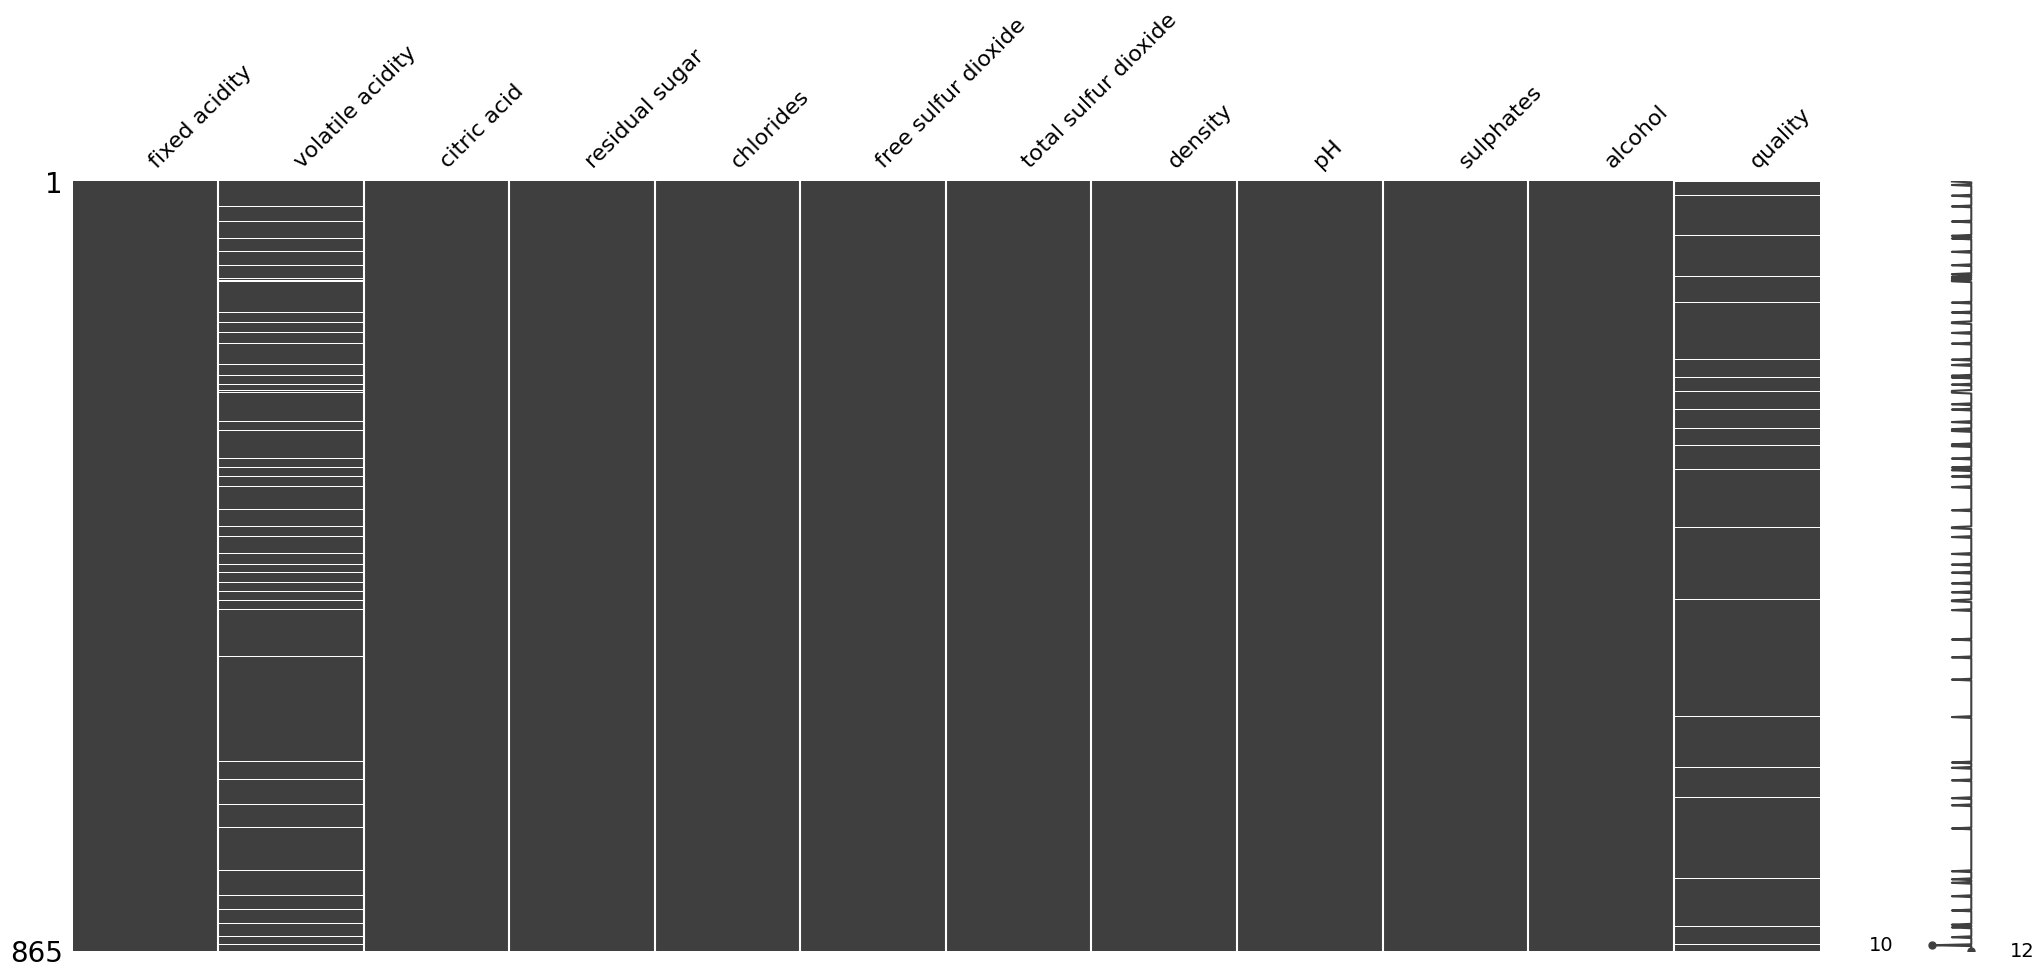

In [16]:
msno.matrix(wine_df_clean_);

### Imputation Techniques

- Impute with default values
- Impute with estimated values
    - Numerial Features - Mean or median based imputation
    - Categorical Features - Most Frequent 
- Model based imputations

In [17]:
wine_df.quality.value_counts()

quality
5.0    456
6.0    354
7.0    118
4.0     32
8.0     10
3.0      5
Name: count, dtype: int64

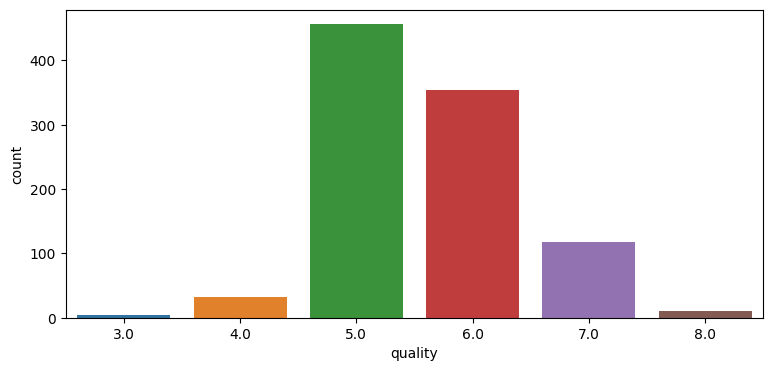

In [18]:
plt.figure(figsize=(9,4))
sn.countplot(wine_df,
             x = 'quality');

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
most_frequent_imputer = SimpleImputer(strategy= 'most_frequent',add_indicator=True) 

In [21]:
quality_imputer = most_frequent_imputer.fit_transform(wine_df[['quality']]);

In [22]:
quality_imputer

array([[5., 1.],
       [5., 0.],
       [5., 0.],
       ...,
       [7., 0.],
       [6., 0.],
       [7., 0.]])

In [23]:
wine_df['quality_impute']= quality_imputer[:,0]
wine_df['quality_indicator']= quality_imputer[:,1]

In [24]:
wine_df[['quality','quality_impute','quality_indicator']][:10]

,quality,quality_impute,quality_indicator
0,NaN,5.0,1.0
1,5.0,5.0,0.0
2,5.0,5.0,0.0
3,6.0,6.0,0.0
4,5.0,5.0,0.0
5,5.0,5.0,0.0
6,5.0,5.0,0.0
7,7.0,7.0,0.0
8,7.0,7.0,0.0
9,5.0,5.0,0.0


#### Heatmap

In [25]:
cor = wine_df[['fixed acidity',
               'volatile acidity',
               'citric acid',
               'residual sugar',
               'chlorides',
               'free sulfur dioxide',
               'total sulfur dioxide',
               'density',
               'pH',
               'sulphates',
               'alcohol',
               'quality']].corr()

cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.279078,0.692303,0.154525,0.022070,-0.143525,-0.176477,0.680285,-0.693195,0.176551,0.067236,0.174523
volatile acidity,-0.279078,1.000000,-0.530966,-0.010358,0.005038,0.025263,0.132288,-0.015901,0.233508,-0.249981,-0.170166,-0.355085
citric acid,0.692303,-0.530966,1.000000,0.124091,0.191813,-0.060221,-0.020933,0.380554,-0.561678,0.289225,0.174350,0.223763
residual sugar,0.154525,-0.010358,0.124091,1.000000,-0.013702,0.123461,0.131933,0.376514,-0.078507,0.004249,0.138594,0.066369
chlorides,0.022070,0.005038,0.191813,-0.013702,1.000000,-0.006523,0.029580,0.126448,-0.243167,0.411887,-0.174279,-0.109697
free sulfur dioxide,-0.143525,0.025263,-0.060221,0.123461,-0.006523,1.000000,0.693789,-0.034764,0.101091,0.038571,-0.033925,-0.088527
total sulfur dioxide,-0.176477,0.132288,-0.020933,0.131933,0.029580,0.693789,1.000000,0.022171,-0.001453,0.037158,-0.187704,-0.242193
density,0.680285,-0.015901,0.380554,0.376514,0.126448,-0.034764,0.022171,1.000000,-0.386198,0.108094,-0.355385,-0.122536
pH,-0.693195,0.233508,-0.561678,-0.078507,-0.243167,0.101091,-0.001453,-0.386198,1.000000,-0.258142,0.147588,-0.056594
sulphates,0.176551,-0.249981,0.289225,0.004249,0.411887,0.038571,0.037158,0.108094,-0.258142,1.000000,0.100521,0.209355


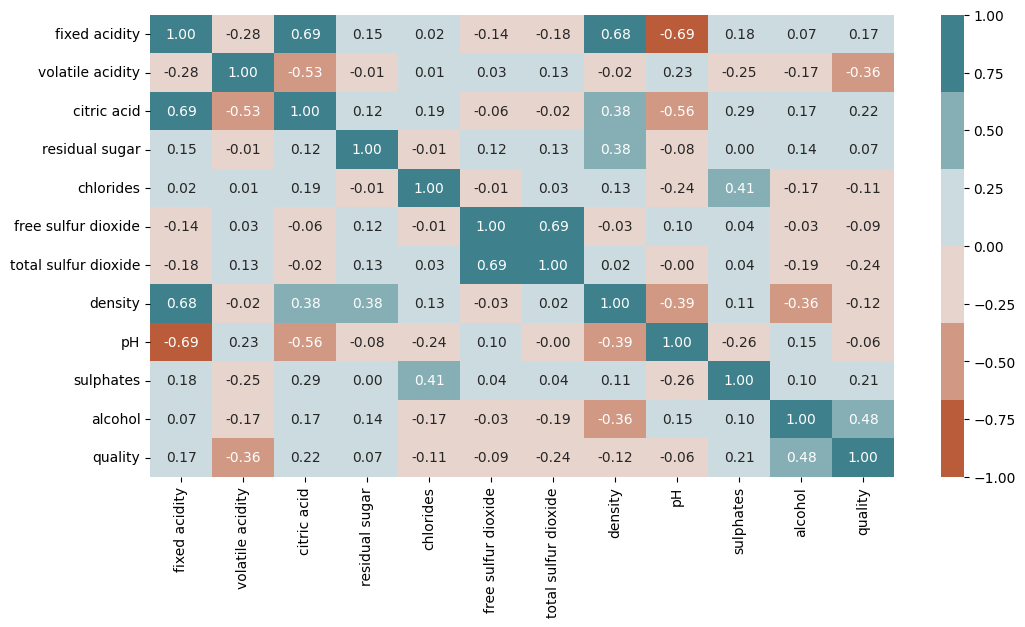

In [26]:
plt.figure(figsize=(12, 6))
sn.heatmap(cor,
           annot=True,
           fmt = "0.2f",
           cmap = sn.diverging_palette(24, 210),
           vmin = -1.0, 
           vmax = 1.0);

#### density vs pH

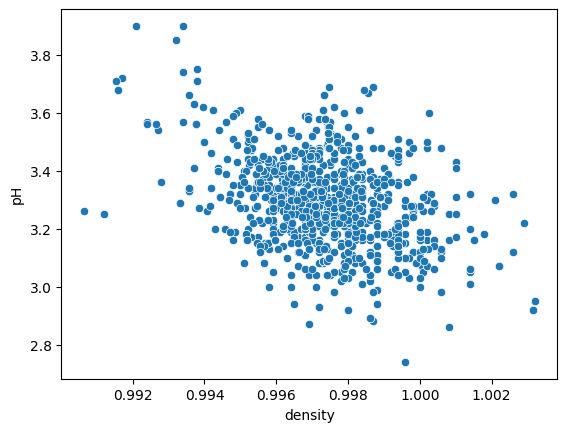

In [27]:
sn.scatterplot(data=wine_df,
               x = 'density',
               y = 'pH');